In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K5F5_1\K5F5_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_6276\894362838.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5F5_1\K5F5_cor.csv', ";")


,K5PS14_1.PV,K5PS14_2.PV,K5L1_1.PV,K5L1_2.PV,K5L1_3.PV,K5L1_4.PV,K5P5_1.PV,K5P5_2.PV,K5BSB_1.PV,K5BSB_2.PV,...,K5T2_1.PV,K5T2_2.PV,K0P102_1.PV,K0T104_2.PV,K5F6X.PV,K5T16.PV,K5T15.PV,K5P8.PV,K5T17.PV,K5L2.PV
0,4.110403,4.224950,13.78617,4.584234,1.391578,312.5545,-40.09245,-39.37344,38.50135,55.80167,...,418.8025,414.9125,4.090837,399.5566,25.91725,96.04542,109.29330,3.947831,125.8089,272.8238
1,4.112575,4.227241,11.90175,3.316688,-0.645750,312.5571,-39.79466,-39.14466,38.05667,55.72771,...,418.4803,414.5512,4.092775,399.6491,25.95287,95.98844,109.34350,3.949697,125.8541,272.7920
2,4.113778,4.228291,10.79170,2.277516,-1.903453,312.5505,-40.09753,-39.45195,38.08927,55.77531,...,418.1625,414.1656,4.094706,399.5097,25.87472,95.92969,109.41330,3.949778,125.8552,272.5587
3,4.115534,4.230028,10.17877,1.721016,-2.264719,312.5371,-40.04427,-40.01524,38.10891,55.77896,...,418.0356,414.0303,4.096784,399.6128,25.80683,95.83218,109.49460,3.954266,125.7343,273.4935
4,4.119669,4.234331,10.18566,1.616016,-2.435016,312.5414,-39.67149,-38.28672,38.09208,55.95422,...,417.9797,413.9844,4.102347,399.7712,25.68059,95.74865,109.53500,3.957666,125.5335,273.1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,4.054531,4.146553,13.56042,5.413078,1.812562,312.0508,-39.74531,-40.73698,37.85849,55.18422,...,419.7872,416.3644,4.072937,406.2756,19.28517,94.74323,94.76354,3.888934,109.6963,291.2326
24476,4.053782,4.145500,15.11245,6.654375,3.261562,312.0475,-40.18984,-40.17812,38.00547,55.58688,...,420.2850,416.8966,4.071069,406.3053,19.44423,94.78865,94.73187,3.887822,109.7346,290.9655
24477,4.054050,4.145563,14.16778,6.071625,2.973141,312.0390,-39.89101,-41.47200,37.95641,55.98161,...,420.6609,417.2797,4.070075,406.6363,19.57814,94.84937,94.64396,3.887925,109.9206,290.5517
24478,4.054375,4.146209,13.59717,5.018015,2.067844,312.0131,-40.71276,-39.99089,37.94604,56.10453,...,420.8572,417.4550,4.069144,406.4106,19.69776,94.92615,94.58417,3.889253,110.1532,290.8658


<Axes: >

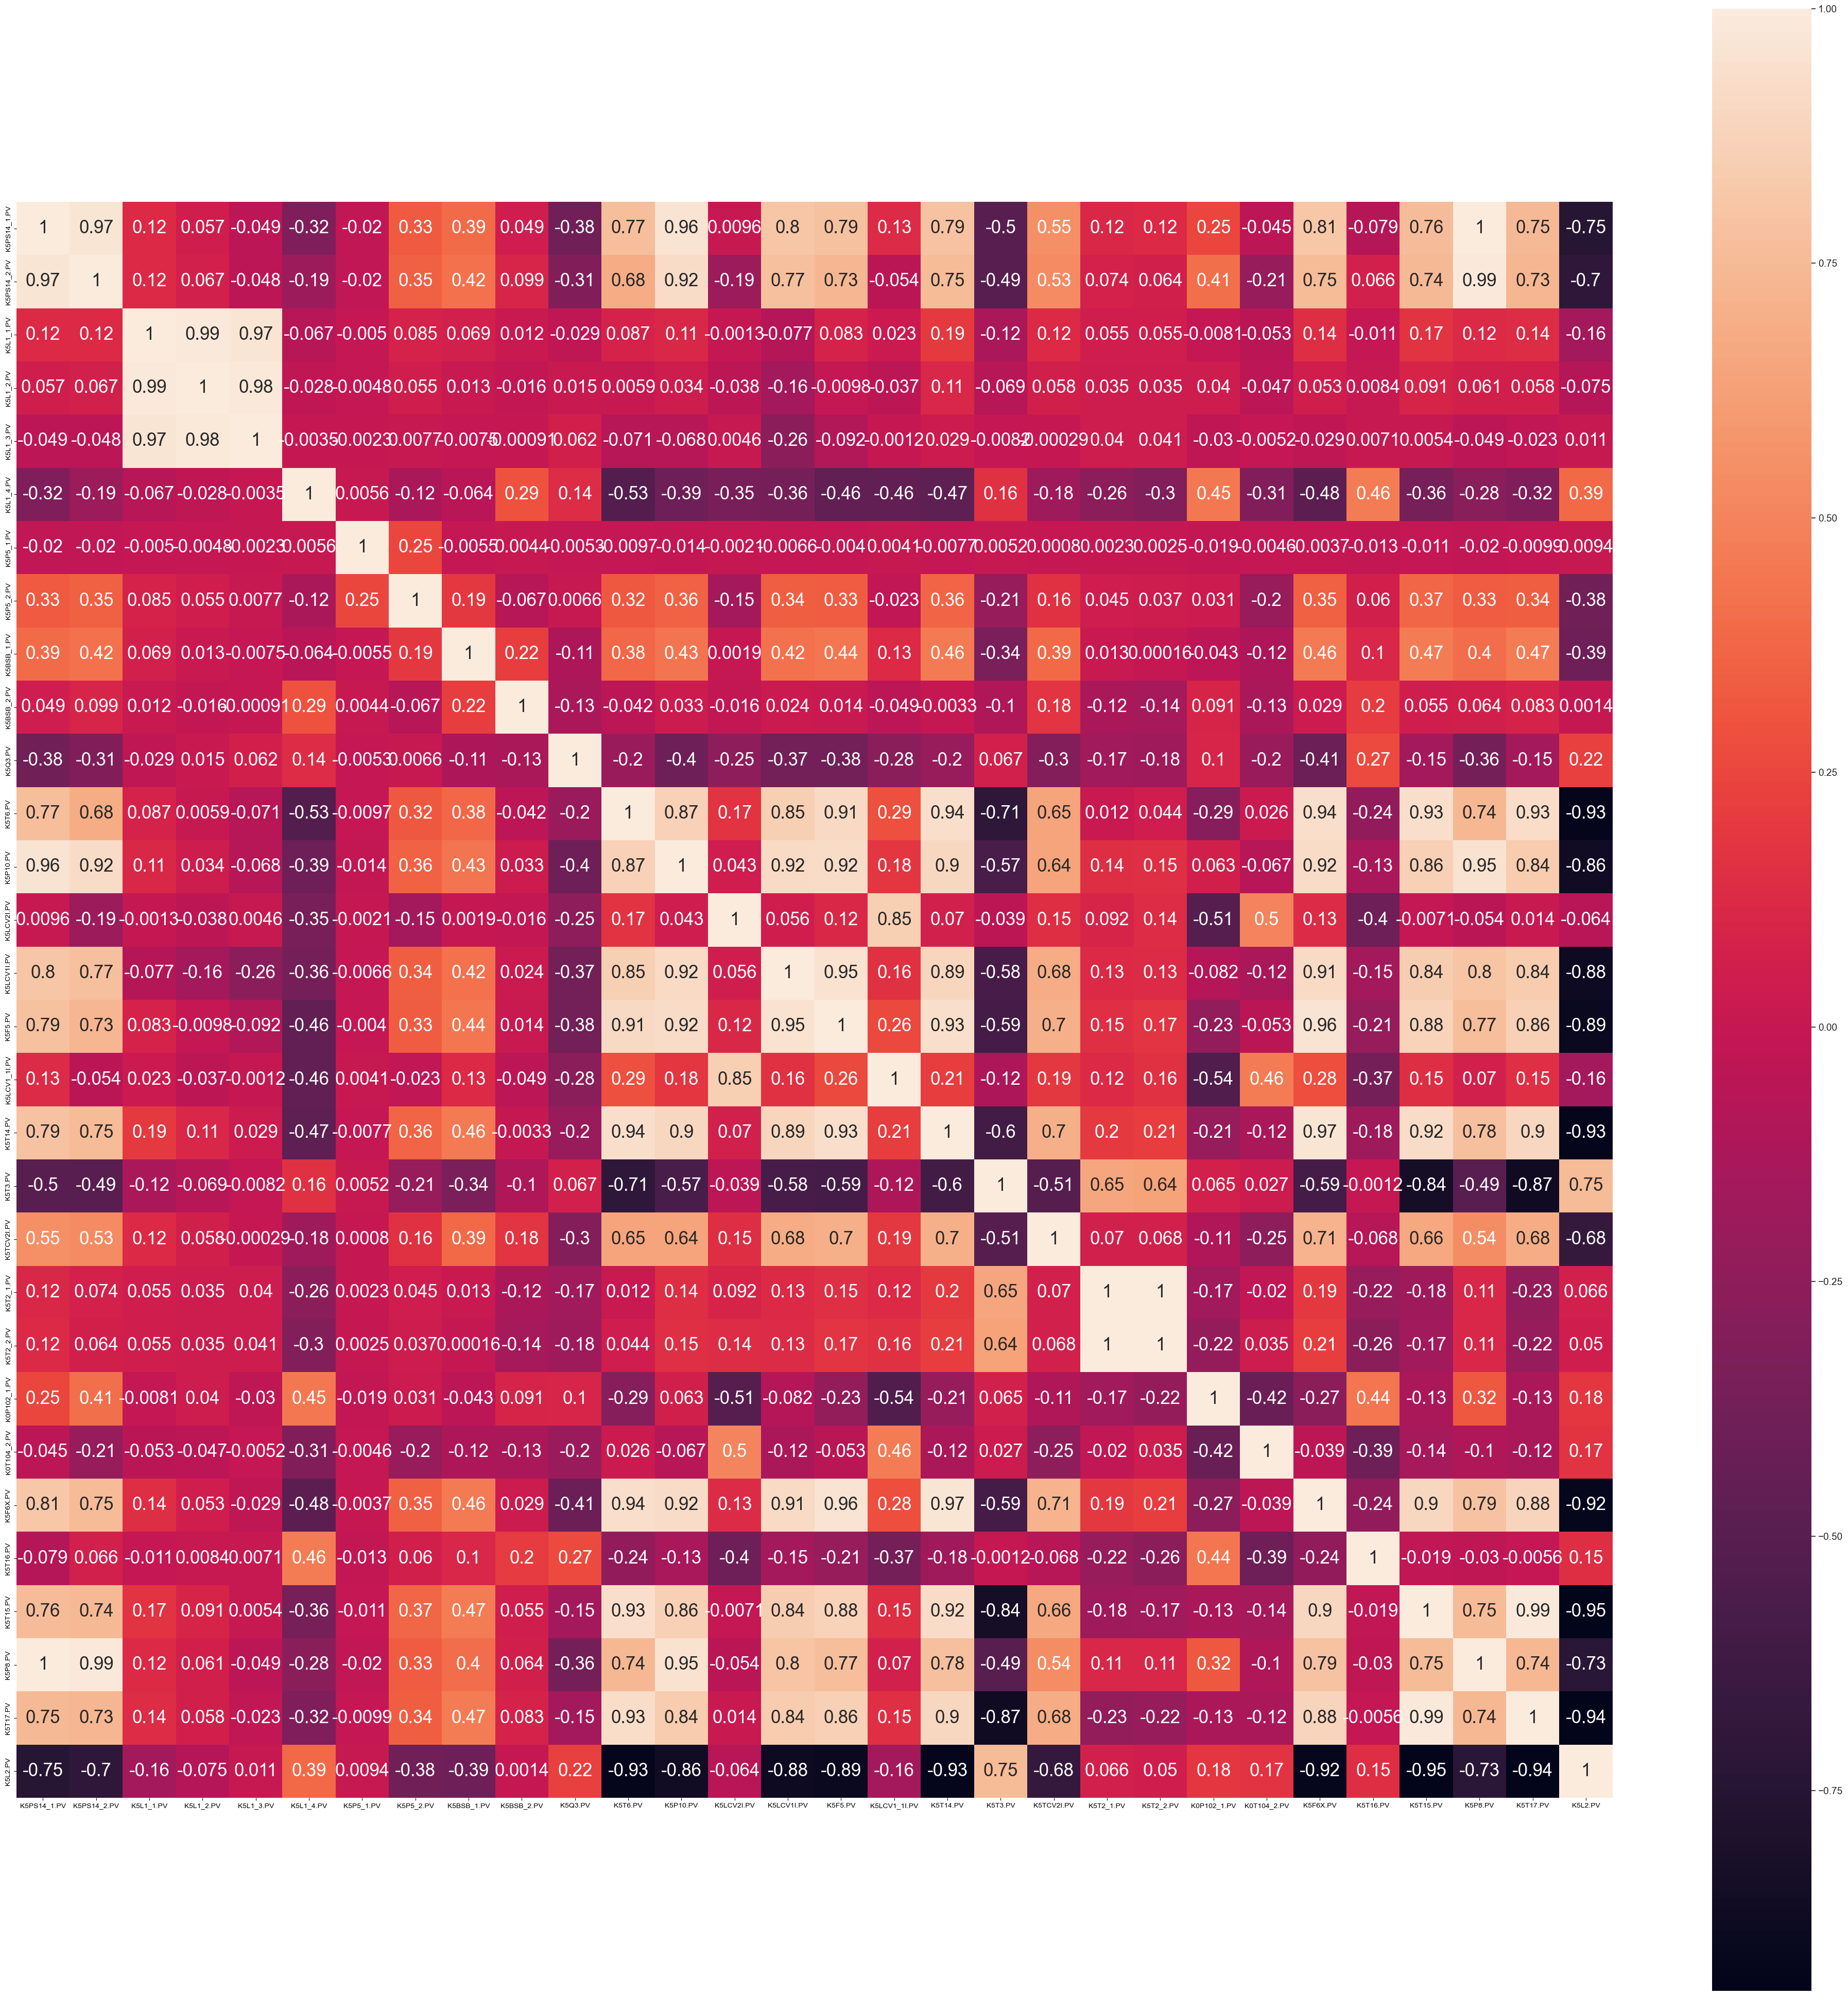

In [3]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [7]:
df = pd.read_csv('..\Initial_data\K5F5_1\K5F5.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_6276\3510915759.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5F5_1\K5F5.csv', ";")


,K5F5.PV,K5LCV1_1I.PV
0,33.58688,0.161094
1,33.75279,0.169219
2,34.27409,0.167031
3,34.62391,0.164427
4,34.65617,0.170417
...,...,...
24475,26.65962,0.135156
24476,24.53633,0.132188
24477,24.2256,0.136198
24478,24.19444,0.135104


In [8]:
df=df.dropna()
df=df.round(2)
df=df.drop_duplicates(["K5F5.PV"])
df=df.drop_duplicates(["K5LCV1_1I.PV"])
df

,K5F5.PV,K5LCV1_1I.PV
0,33.58688,0.16
1,33.75279,0.17
31,34.68483,0.18
61,34.71809,0.19
64,33.84457,0.20
83,34.27991,0.21
99,34.45056,0.22
106,34.00172,0.23
151,34.44724,0.24
229,34.14336,0.15


In [9]:
y = df.drop(['K5LCV1_1I.PV'], axis=1)
x = df.drop(['K5F5.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(0, 100, 100)[:, np.newaxis] # Точки для предсказания

In [11]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
clf.score(X_test, y_test)

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


0.17935705368359167

In [12]:
import pickle
filename = '../model/K5F5_1.sav'
pickle.dump(clf, open(filename, 'wb'))